<a href="https://colab.research.google.com/github/gmdeorozco/Scikit-Learn-Library/blob/main/MultipleLinearRegressionReplica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files

In [2]:
upload = files.upload()

Saving Advertising.csv to Advertising.csv


In [3]:
data = pd.read_csv('Advertising.csv')
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

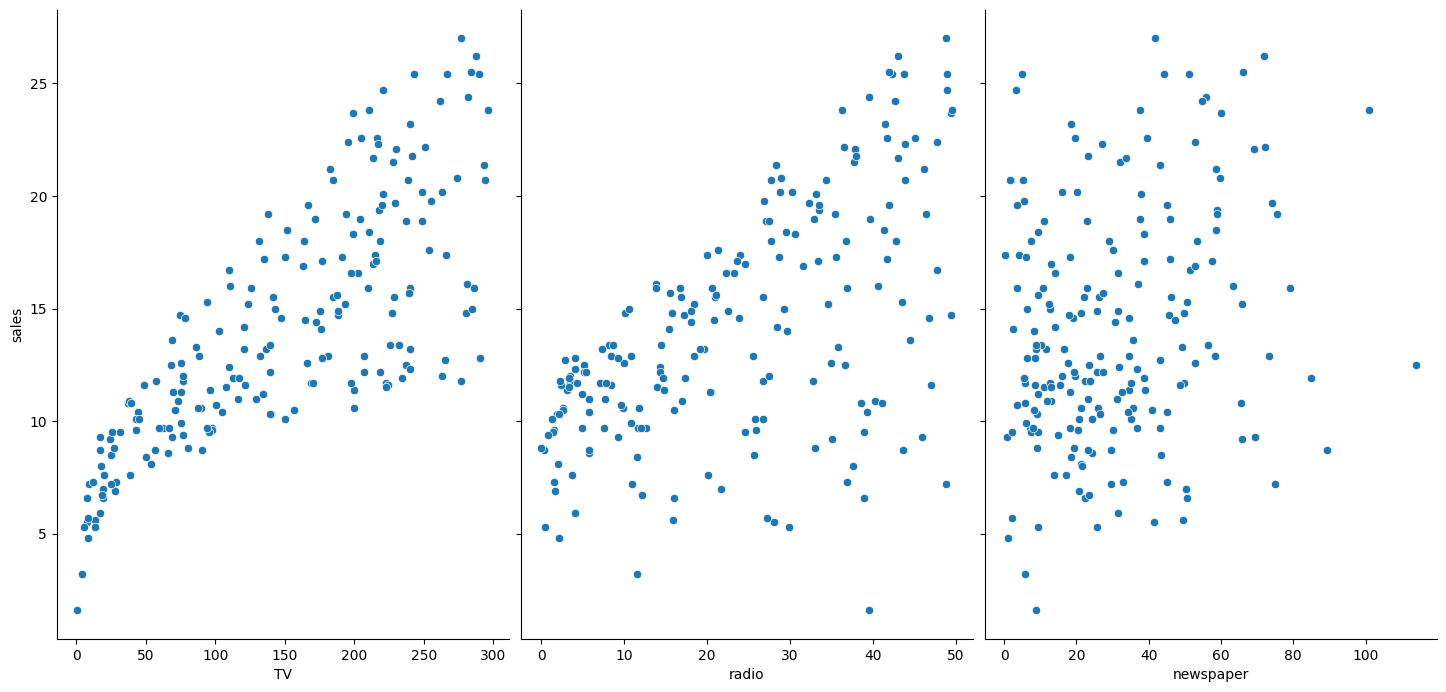

In [8]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars = ['sales'], height = 7, aspect = 0.7)

In [18]:
y = data['sales']
X = data[['TV','radio','newspaper']]
feature_cols = ['TV','radio','newspaper']

In [10]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()

In [13]:
lm1.fit(X,y)

LinearRegression()

In [14]:
lm1.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [20]:
list(zip(feature_cols,lm1.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820448),
 ('newspaper', -0.0010374930424763285)]

<Axes: >

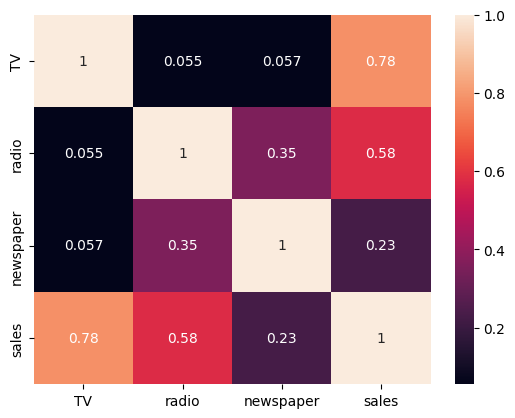

In [21]:
sns.heatmap(data.corr(), annot= True)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_model_1 = data[['TV','radio','newspaper']]
y_model_1 = data.sales

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_model_1, y_model_1, random_state=1)
lm1.fit(X_train1, y_train1)
pred1 = lm1.predict(X_test1)

In [32]:
X_model_2 = data[['TV','radio']]
y_model_2 = data['sales']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_model_2, y_model_2, random_state=1)

lm2 = LinearRegression()
lm2.fit( X_train2, y_train2)
pred2= lm2.predict(X_test2)

In [36]:
np.sqrt(mean_squared_error(y_test1,pred1))

1.404651423032895

In [37]:
np.sqrt(mean_squared_error(y_test2, pred2))

1.3879034699382888

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_test1,pred1)

0.9156213613792232

In [40]:
r2_score(y_test2, pred2)

0.9176214942248907

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


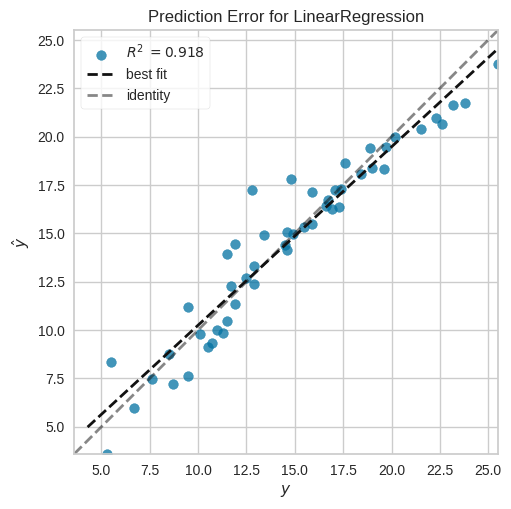

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [42]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm2)

visualizer.fit(X_train2, y_train2)
visualizer.score(X_test2, y_test2)
visualizer.poof()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


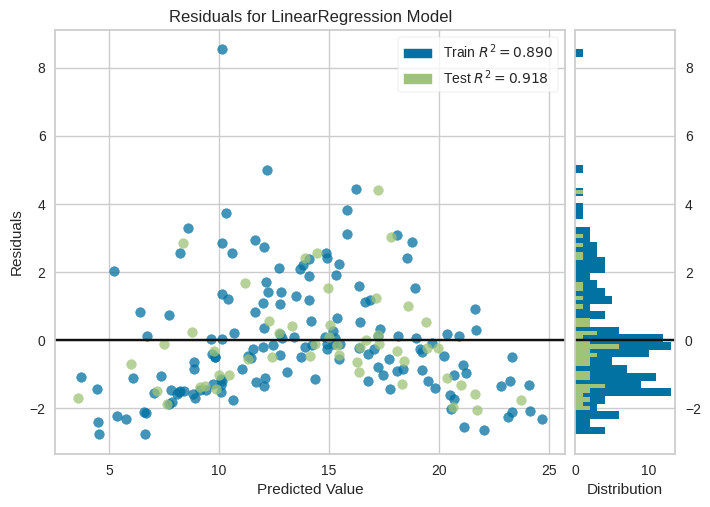

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [44]:
visualizer = ResidualsPlot(lm2)
visualizer.fit(X_train2, y_train2)
visualizer.score(X_test2, y_test2)
visualizer.poof()

In [45]:
data['interaction'] = data['TV'] * data['radio']

In [46]:
data.head()

,TV,radio,newspaper,sales,interaction
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64


In [47]:
X = data[['TV','radio','interaction']]
y = data.sales

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [49]:
lmfinal = LinearRegression().fit(X_train, y_train)
pred=lmfinal.predict(X_test)
print("RMSE", np.sqrt(mean_squared_error(y_test,pred)))
print("R2", r2_score(y_test,pred))

RMSE 0.7011871137164328
R2 0.978973681468126


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


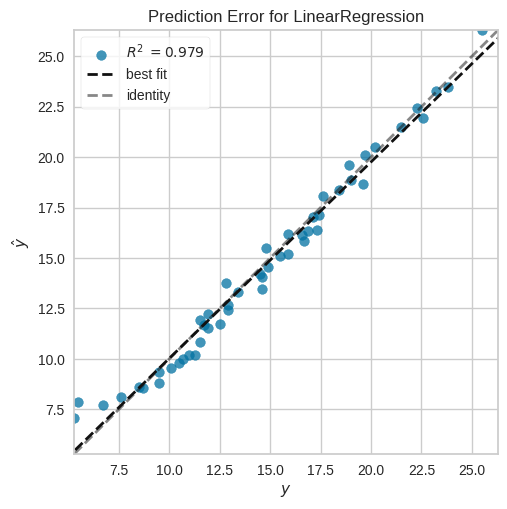

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [51]:
visualizer = PredictionError(lmfinal)
visualizer.fit(X_train, y_train)
visualizer.score(X_test,y_test)
visualizer.poof()